In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
class ProjectKNN:
    data = None
    data_train = None
    data_test = None
    model = None
    optimizer = None
    loss_function = None
    model_loss = 10000
    early_stop = 0

    def __init__(self, data_path='LocTreino_Equipe_3.csv', log_dir='log_mlp/'):
        self.data = pd.read_csv(data_path)
        self.preproccess_data()
        self.split_data()
        self.declare_model()

    def preproccess_data(self):
        self.data = self.data.drop_duplicates()
        self.data = self.data.dropna()

    def split_data(self):
        self.X = self.data[[
            x for x in self.data.columns if x not in ('lat', 'lon')]].values
        self.y = self.data[[
            x for x in self.data.columns if x in ('lat', 'lon')]].values

        self.data_train = self.data_test = self.data
        self.data_train = self.data_train[:int(0.9 * len(self.data_train))]
        self.data_test = self.data_test[int(0.9 * len(self.data_test)):]

    def declare_model(self):
        params = {'n_neighbors': [1, 3, 5, 8, 13],
                  'metric': ['euclidian', 'manhattan'],
                  'weights': ['uniform', 'distance'],
                  'leaf_size': [30, 33, 55, 88]
                  }
        knn = KNeighborsRegressor()
        self.model = GridSearchCV(knn, params,
                                  verbose=1, cv=3, n_jobs=-1)

    def train(self):
        batch = self.data_train
        x_batch = batch[[
            x for x in batch.columns if x not in ('lat', 'lon')]].values
        y_batch = batch[[
            x for x in batch.columns if x in ('lat', 'lon')]].values

        self.model.fit(x_batch, y_batch)
        self.model = knn.model.best_estimator_
        print(self.model)

    def test(self):
        x_batch = self.data_test[[
            x for x in self.data_test.columns if x not in ('lat', 'lon')]].values
        y_batch = self.data_test[[
            x for x in self.data_test.columns if x in ('lat', 'lon')]].values

        out = self.model.predict(x_batch)
        return out, y_batch

In [3]:
knn = ProjectKNN()
knn.train()
out, y_batch = knn.test()

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.0s


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='distance')


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.2s finished


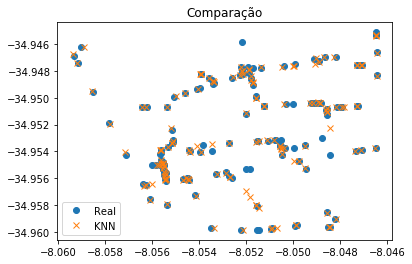

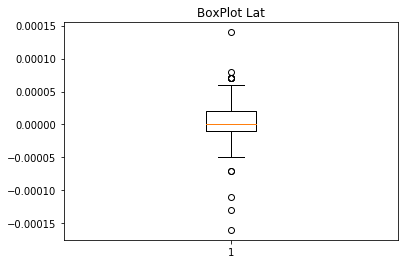

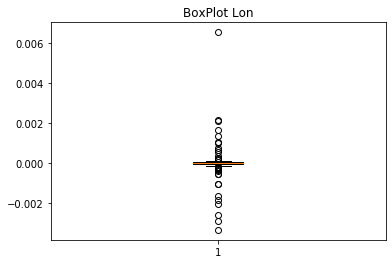

In [38]:
fig, ax = plt.subplots()
ax.plot([x[0] for x in y_batch], [x[1] for x in y_batch], 'o', label='Real')
ax.plot([x[0] for x in out], [x[1] for x in out], 'x', label='KNN')
ax.legend()
ax.set_title('Comparação')
plt.show()
error = y_batch - out
errors_x = error[:, 0]
errors_y = error[:, 1]

fig, ax = plt.subplots()
ax.boxplot(errors_x)
ax.set_title('BoxPlot Lat')
plt.show()

fig, ax = plt.subplots()
ax.boxplot(errors_y)
ax.set_title('BoxPlot Lon')
plt.show()

In [5]:
dists = []
for i in range(len(out)):
    dists.append(np.linalg.norm(y_batch[i] - out[i]))

In [12]:
print(f'Erro Médio: {np.mean(dists)}\nErro Mínimo: {min(dists)}\nErro Máximo: {max(dists)}\nDesvio Padrão: {np.std(dists)}')

Erro Médio: 0.0002976730611846374
Erro Mínimo: 9.999999996068709e-06
Erro Máximo: 0.006540068806978588
Desvio Padrão: 0.0007602671122559543


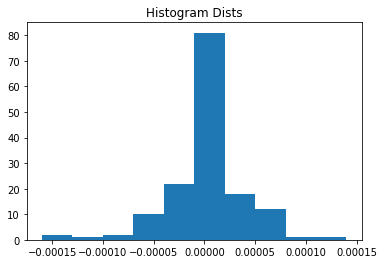

In [26]:
fig, ax = plt.subplots()
ax.hist(errors_x, 10)
ax.set_title('Histogram Dists')
plt.show()

In [30]:
y = knn.data[[
            x for x in knn.data.columns if x in ('lat', 'lon')]].values

In [33]:
lats = y[:, 0]
lons = y[:, 1] 

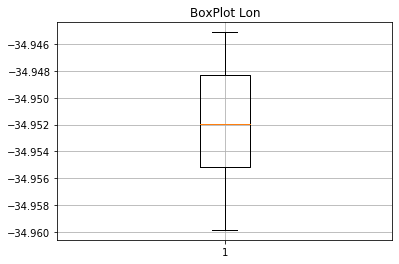

In [42]:
fig, ax = plt.subplots()
ax.boxplot(lons)
ax.set_title('BoxPlot Lon')
plt.grid(True)
plt.show()

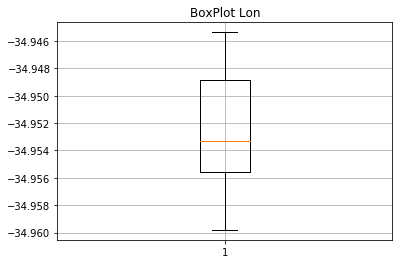

In [43]:
fig, ax = plt.subplots()
ax.boxplot(out[:, 1])
ax.set_title('BoxPlot Lon')
plt.grid(True)
plt.show()

In [44]:
knn.data

,lat,lon,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,pontoId
0,-8.05668,-34.95561,-95.470000,-99.045714,-94.830000,-99.053333,-91.565000,-94.780000,-85.778333,-65.878000,-86.2200,6,5,1,6771
1,-8.05560,-34.95443,-91.024286,-96.200000,-84.510000,-96.011667,-91.935000,-92.655714,-78.636667,-71.052000,-93.4700,6,5,2,7044
2,-8.05294,-34.94872,-84.270000,-88.675714,-89.072857,-72.580000,-87.850000,-81.947143,-91.170000,-91.176000,-97.2550,5,2,4,7810
3,-8.05555,-34.95632,-91.007143,-99.115714,-90.121786,-96.106667,-92.837500,-93.881429,-85.855000,-65.690000,-87.0050,6,6,1,7088
4,-8.05064,-34.95492,-83.569286,-99.412500,-81.272857,-99.838333,-94.413750,-94.043571,-83.848889,-98.568667,-94.1400,4,5,3,8636
5,-8.05141,-34.95324,-95.040000,-92.237143,-84.834286,-86.520000,-87.490000,-85.752857,-96.880000,-95.046000,-94.7075,4,4,3,8439
6,-8.05507,-34.95365,-87.520000,-96.472857,-90.330000,-94.078333,-88.910000,-91.758571,-89.640000,-73.570000,-97.3075,6,4,2,7384
7,-8.04773,-34.94539,-89.632857,-89.551429,-91.723571,-87.900000,-92.530000,-82.104286,-87.835833,-81.828000,-96.9200,4,2,7,9416
8,-8.05585,-34.95078,-88.280000,-93.535714,-91.666667,-85.280000,-77.245000,-81.960000,-92.733333,-93.204000,-96.3725,6,3,3,6934
9,-8.05447,-34.95605,-92.876190,-98.737143,-91.640000,-101.737500,-101.517500,-95.780000,-81.810000,-88.000000,-94.8400,6,5,1,7487
